Refactored

In [88]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest



tqdm.pandas()

tradingData = pd.read_csv("../data/^ixic-6mo-1h.csv")
tradingData.Datetime = pd.to_datetime(tradingData.Datetime, utc=True)
tradingData=tradingData[tradingData.High != tradingData.Low]
tradingData.set_index('Datetime', inplace=True)
tradingData.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close  
Datetime                                 
2023-10-18 13:30:00+00:00  13451.814453  
2023-10-18 14:30:00+00:00  13415.507812  
2023-10-18 15:30:00+00:00  13398.106445  
2023-10-18 16:30:00+00:00  13418.132812  
2023-10-18 17:30:00+00:00  13379.012695  
...                                 ...  
2024-04-17 15:30:00+00:00  15715.237305  
2024-04-17 16:30:00+00:00  15741.280273  
2024-04-17 17:30:00+00:00  15748.874023  
2024-04-17 18:30:00+00:00  15689.807617  
2024-04-17 19:30:00+00:00  15683.372070  

[871 rows x 4 columns]

In [89]:
tradingData['EMA'] = ta.ema(tradingData.Close, length=200)
macd = ta.macd(tradingData.Close)
macd

tradingData['MACD'] = macd.loc[:, 'MACD_12_26_9']
tradingData['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
tradingData['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']
tradingData['ATR'] = ta.atr(tradingData.High, tradingData.Low, tradingData.Close, length=7)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close           EMA        MACD  \
Datetime                                                            
2023-10-18 13:30:00+00:00  13451.814453           NaN         NaN   
2023-10-18 14:30:00+00:00  13415.507812           NaN         NaN   
2023-10-18 15:30:00+00:00  13398.106445           NaN         NaN   
2023-10-18 16:30:00+00:00  13418.132812           NaN         NaN   
2023-10-18 17:30:00+00:00  13379.012695           NaN         NaN   
...                                 ...           ...         ...   
2024-04-17 15:30:00+00:00  15715.237305  16142.790400 -105.568474   
2024-04-17 16:30:00+00:00  15741.280273  16138.795274 -108.684552   
2024-04-17 17:30:00+00:00  15748.874023  16134.915461 -109.281584   
2024-04-17 18:30:00+00:00  15689.807617  16130.486527 -113.215820   
2024-04-17 19:30:00+00:00  15683.372070  16126.037627 -115.521367   

                           MACD_signal  MACD_histogram        ATR  
Datetime                                                           
2023-10-18 13:30:00+00:00          NaN             NaN        NaN  
2023-10-18 14:30:00+00:00          NaN             NaN        NaN  
2023-10-18 15:30:00+00:00          NaN             NaN        NaN  
2023-10-18 16:30:00+00:00          NaN             NaN        NaN  
2023-10-18 17:30:00+00:00          NaN             NaN        NaN  
...                                ...             ...        ...  
2024-04-17 15:30:00+00:00   -93.078959      -12.489515  87.330969  
2024-04-17 16:30:00+00:00   -96.200078      -12.484475  87.212398  
2024-04-17 17:30:00+00:00   -98.816379      -10.465205  80.789059  
2024-04-17 18:30:00+00:00  -101.696267      -11.519553  87.110907  
2024-04-17 19:30:00+00:00  -104.461287      -11.060080  81.959042  

[871 rows x 9 columns]

In [90]:
tradingData.describe()

Open          High           Low         Close           EMA  \
count    871.000000    871.000000    871.000000    871.000000    672.000000   
mean   15060.848559  15088.398646  15031.490716  15061.298348  15128.425133   
std     1058.130597   1057.311401   1055.879397   1057.335034    798.195590   
min    12559.638672  12598.190430  12544.980469  12559.511719  13543.200283   
25%    14271.728516  14285.828613  14241.983887  14271.528809  14538.083070   
50%    15124.636719  15135.620117  15108.591797  15124.463867  15200.095645   
75%    16014.546875  16044.485840  15986.513672  16009.593262  15884.228922   
max    16523.082031  16538.269531  16470.300781  16505.580078  16185.102955   

             MACD  MACD_signal  MACD_histogram         ATR  
count  838.000000   838.000000      838.000000  864.000000  
mean    23.333190    23.265266        0.067924   62.347447  
std     58.656332    55.037864       18.541573   15.395593  
min   -145.235377  -129.624292      -56.180907   30.739979  
25%    -11.924335    -9.423000      -11.978800   49.931339  
50%     27.945231    28.267980       -0.533499   61.362644  
75%     62.586887    60.153245       10.219581   73.988859  
max    163.869437   151.051402       64.683041  118.055658

In [91]:
def ema_signal(df, current, go_back_number):
  df_slice = df.copy()
  start = max(0, current - go_back_number)
  end = current
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return 'downtrend'
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 'uptrend'
  else:
    return 'neutral'

tradingData.reset_index(inplace=True)
tradingData['EMASignal'] = tradingData.progress_apply(
  lambda row: ema_signal(tradingData, row.name, 5), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 6320.61it/s]


Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  16142.790400 -105.568474   -93.078959      -12.489515   
867  15741.280273  16138.795274 -108.684552   -96.200078      -12.484475   
868  15748.874023  16134.915461 -109.281584   -98.816379      -10.465205   
869  15689.807617  16130.486527 -113.215820  -101.696267      -11.519553   
870  15683.372070  16126.037627 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  
0          NaN  downtrend  
1          NaN    neutral  
2          NaN    neutral  
3          NaN    neutral  
4          NaN    neutral  
..         ...        ...  
866  87.330969  downtrend  
867  87.212398  downtrend  
868  80.789059  downtrend  
869  87.110907  downtrend  
870  81.959042  downtrend  

[871 rows x 11 columns]

In [92]:
def total_signal(df, current, go_back_number):
    if (ema_signal(df, current, go_back_number) == 'uptrend' and
        all(df.loc[current - 3:current - 2, 'MACD'] < df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] > df.loc[current - 1:current, 'MACD_signal'])
        ):
            return 2
    if (ema_signal(df, current, go_back_number)==1 and
        all(df.loc[current - 3:current - 2, 'MACD'] > df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] < df.loc[current - 1:current, 'MACD_signal'])
        ):

            return 1
    return 0

tradingData['TotalSignal'] = tradingData.progress_apply(
       lambda row: total_signal(tradingData, row.name, 7), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 2125.70it/s]


Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  16142.790400 -105.568474   -93.078959      -12.489515   
867  15741.280273  16138.795274 -108.684552   -96.200078      -12.484475   
868  15748.874023  16134.915461 -109.281584   -98.816379      -10.465205   
869  15689.807617  16130.486527 -113.215820  -101.696267      -11.519553   
870  15683.372070  16126.037627 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  TotalSignal  
0          NaN  downtrend            0  
1          NaN    neutral            0  
2          NaN    neutral            0  
3          NaN    neutral            0  
4          NaN    neutral            0  
..         ...        ...          ...  
866  87.330969  downtrend            0  
867  87.212398  downtrend            0  
868  80.789059  downtrend            0  
869  87.110907  downtrend            0  
870  81.959042  downtrend            0  

[871 rows x 12 columns]

In [93]:
tradingData[tradingData.TotalSignal != 0].head(20)

Datetime          Open          High           Low  \
216 2023-12-01 17:30:00+00:00  14283.432617  14311.947266  14275.969727   
228 2023-12-05 15:30:00+00:00  14224.403320  14285.558594  14207.474609   
242 2023-12-07 15:30:00+00:00  14304.929688  14313.722656  14253.192383   
259 2023-12-11 18:30:00+00:00  14415.558594  14433.842773  14414.131836   
320 2023-12-22 16:30:00+00:00  15013.154297  15023.429688  14989.929688   
340 2023-12-28 15:30:00+00:00  15136.202148  15149.900391  15114.722656   
432 2024-01-18 16:30:00+00:00  15039.760742  15047.292969  14960.068359   
459 2024-01-24 15:30:00+00:00  15577.142578  15613.206055  15552.051758   
485 2024-01-29 20:30:00+00:00  15620.563477  15629.439453  15603.919922   
506 2024-02-01 20:30:00+00:00  15359.461914  15372.059570  15330.623047   
529 2024-02-07 15:30:00+00:00  15756.551758  15756.551758  15706.692383   
570 2024-02-15 14:30:00+00:00  15872.697266  15882.257812  15808.068359   
639 2024-02-29 20:30:00+00:00  16054.853516  16115.252930  16051.454102   
665 2024-03-06 18:30:00+00:00  16119.707031  16121.794922  16004.592773   
669 2024-03-07 15:30:00+00:00  16202.995117  16242.939453  16185.500977   
691 2024-03-12 15:30:00+00:00  16250.869141  16251.669922  16183.899414   
718 2024-03-18 14:30:00+00:00  16242.105469  16244.125000  16177.679688   
728 2024-03-19 17:30:00+00:00  16146.315430  16172.199219  16137.277344   
776 2024-03-28 16:30:00+00:00  16393.414062  16393.810547  16367.224609   
796 2024-04-03 15:30:00+00:00  16336.006836  16340.727539  16285.194336   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
216  14275.969727  13649.671035   -4.797537   -11.073101        6.275564   
228  14218.098633  13710.881674  -11.837147   -14.816507        2.979360   
242  14281.346680  13778.014887    7.471708     1.031228        6.440480   
259  14427.320312  13871.139900   41.908134    40.393104        1.515030   
320  15005.834961  14307.767266   31.248322    29.020408        2.227913   
340  15120.105469  14445.100550   41.661184    41.006950        0.654233   
432  14981.042969  14681.642104   11.067628    -2.786692       13.854319   
459  15567.727539  14829.748384  109.554103   102.583619        6.970484   
485  15629.024414  14987.161620   41.868532    35.347381        6.521150   
506  15361.317383  15058.467299  -41.584241   -49.012341        7.428100   
529  15719.308594  15168.940137   51.970463    42.107081        9.863382   
570  15821.536133  15390.426834   -5.990393   -14.005402        8.015009   
639  16088.887695  15647.790740   26.463331    21.056784        5.406546   
665  16060.756836  15755.681282  -14.963953   -16.948895        1.984942   
669  16241.905273  15770.041040   10.660074    -9.349133       20.009208   
691  16189.815430  15846.203379    0.565832    -8.725357        9.291189   
718  16192.213867  15911.794706  -16.618794   -29.006912       12.388119   
728  16161.052734  15931.306196    0.599799    -6.742285        7.342084   
776  16372.154297  16100.100223    2.386629     2.256349        0.130280   
796  16320.144531  16137.622206  -23.141669   -29.350666        6.208997   

           ATR EMASignal  TotalSignal  
216  60.856716   uptrend            2  
228  67.591726   uptrend            2  
242  64.875275   uptrend            2  
259  44.162565   uptrend            2  
320  56.353949   uptrend            2  
340  36.433885   uptrend            2  
432  76.591306   uptrend            2  
459  57.744351   uptrend            2  
485  43.253926   uptrend            2  
506  73.264526   uptrend            2  
529  66.799304   uptrend            2  
570  74.011490   uptrend            2  
639  55.459583   uptrend            2  
665  80.701710   uptrend            2  
669  85.871102   uptrend            2  
691  82.643377   uptrend            2  
718  93.100313   uptrend            2  
728  71.035658   uptrend            2  
776  45.766520   uptrend            2  
796  60.053933   uptrend            2

In [94]:
def pointpos(x):
    if x['TotalSignal'] == 2:
        return x['Low']-1e-3
    elif x['TotalSignal'] == 1:
        return x['High']+1e-3
    else:
        return np.nan

tradingData['pointpos'] = tradingData.apply(lambda row: pointpos(row), axis='columns')

In [95]:
st=1100
dfpl = tradingData
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

fig.show()

In [96]:
tradingData

Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  16142.790400 -105.568474   -93.078959      -12.489515   
867  15741.280273  16138.795274 -108.684552   -96.200078      -12.484475   
868  15748.874023  16134.915461 -109.281584   -98.816379      -10.465205   
869  15689.807617  16130.486527 -113.215820  -101.696267      -11.519553   
870  15683.372070  16126.037627 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  TotalSignal  pointpos  
0          NaN  downtrend            0       NaN  
1          NaN    neutral            0       NaN  
2          NaN    neutral            0       NaN  
3          NaN    neutral            0       NaN  
4          NaN    neutral            0       NaN  
..         ...        ...          ...       ...  
866  87.330969  downtrend            0       NaN  
867  87.212398  downtrend            0       NaN  
868  80.789059  downtrend            0       NaN  
869  87.110907  downtrend            0       NaN  
870  81.959042  downtrend            0       NaN  

[871 rows x 13 columns]

In [97]:
dfopt = tradingData[:]
def SIGNAL():
    return dfopt.TotalSignal

In [100]:
class MyStrat(Strategy):
    mysize = 3000
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1 == 2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == 1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=25000000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_47633/3132391866.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                     870.0
Duration                                870.0
Exposure Time [%]                   18.484501
Equity Final [$]              27697126.957047
Equity Peak [$]               27988291.834337
Return [%]                          10.788508
Buy & Hold Return [%]               16.589268
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.199088
Avg. Drawdown [%]                   -0.850897
Max. Drawdown Duration                  108.0
Avg. Drawdown Duration              25.526316
# Trades                                 20.0
Win Rate [%]                             60.0
Best Trade [%]                       1.210433
Worst Trade [%]                     -1.012506
Avg. Trade [%]                    

In [101]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.4,TPSLRatio=1.6)>

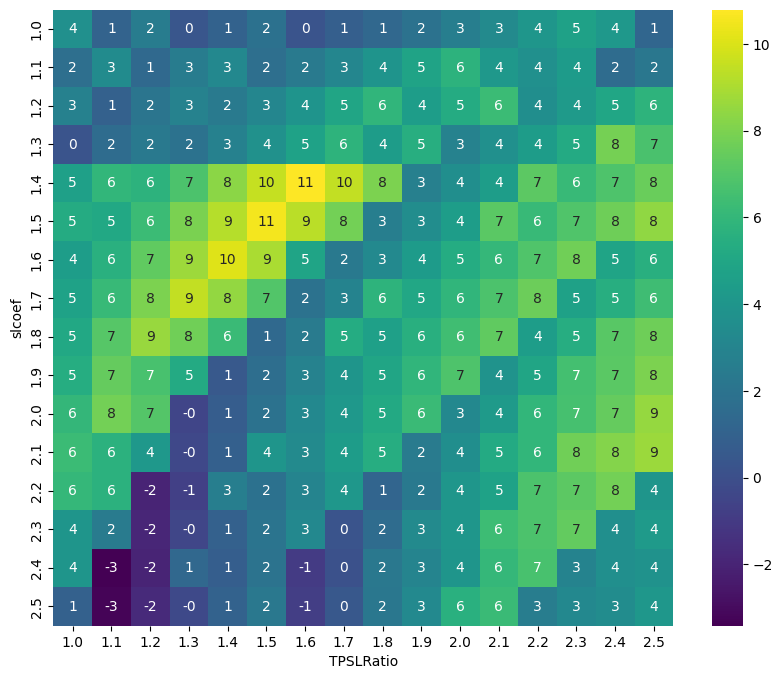

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()